In [35]:
import networkx as nx
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv("D:\BU\BE700\project\data\HPA-Protein\lung.tsv", delimiter = '\t', header = None, usecols = [0,1])
G = nx.from_pandas_edgelist(data, source = 0, target = 1)
A = nx.to_numpy_matrix(G)
all_nodes = list(G.nodes())

In [37]:
##########################################################
# guilt by association
##########################################################
sec_kro_ppi = json.load(open('sec_kro_ppi.json'))
krogan_proteins = list(pd.read_excel("D:\BU\BE700\project\data\convert_unique.xlsx", usecols= [0])['Gene stable ID'])
neighbor = list(sec_kro_ppi.keys())

filtered_ppi = {}
for i in sec_kro_ppi.keys():
    if len(sec_kro_ppi[i]) >= 20:
        filtered_ppi.update({i: sec_kro_ppi[i]})
        
filtered_neighbor = list(filtered_ppi.keys())
print(len(filtered_neighbor))

14


In [38]:
non_link = {}
for gene in filtered_neighbor:
    non_link[gene] = []
    for i in np.where(A[all_nodes.index(gene)] == 1)[1]:
        if not(all_nodes[i] in krogan_proteins) and not(all_nodes[i] in sec_kro_ppi.keys()):
            non_link[gene].append(all_nodes[i])

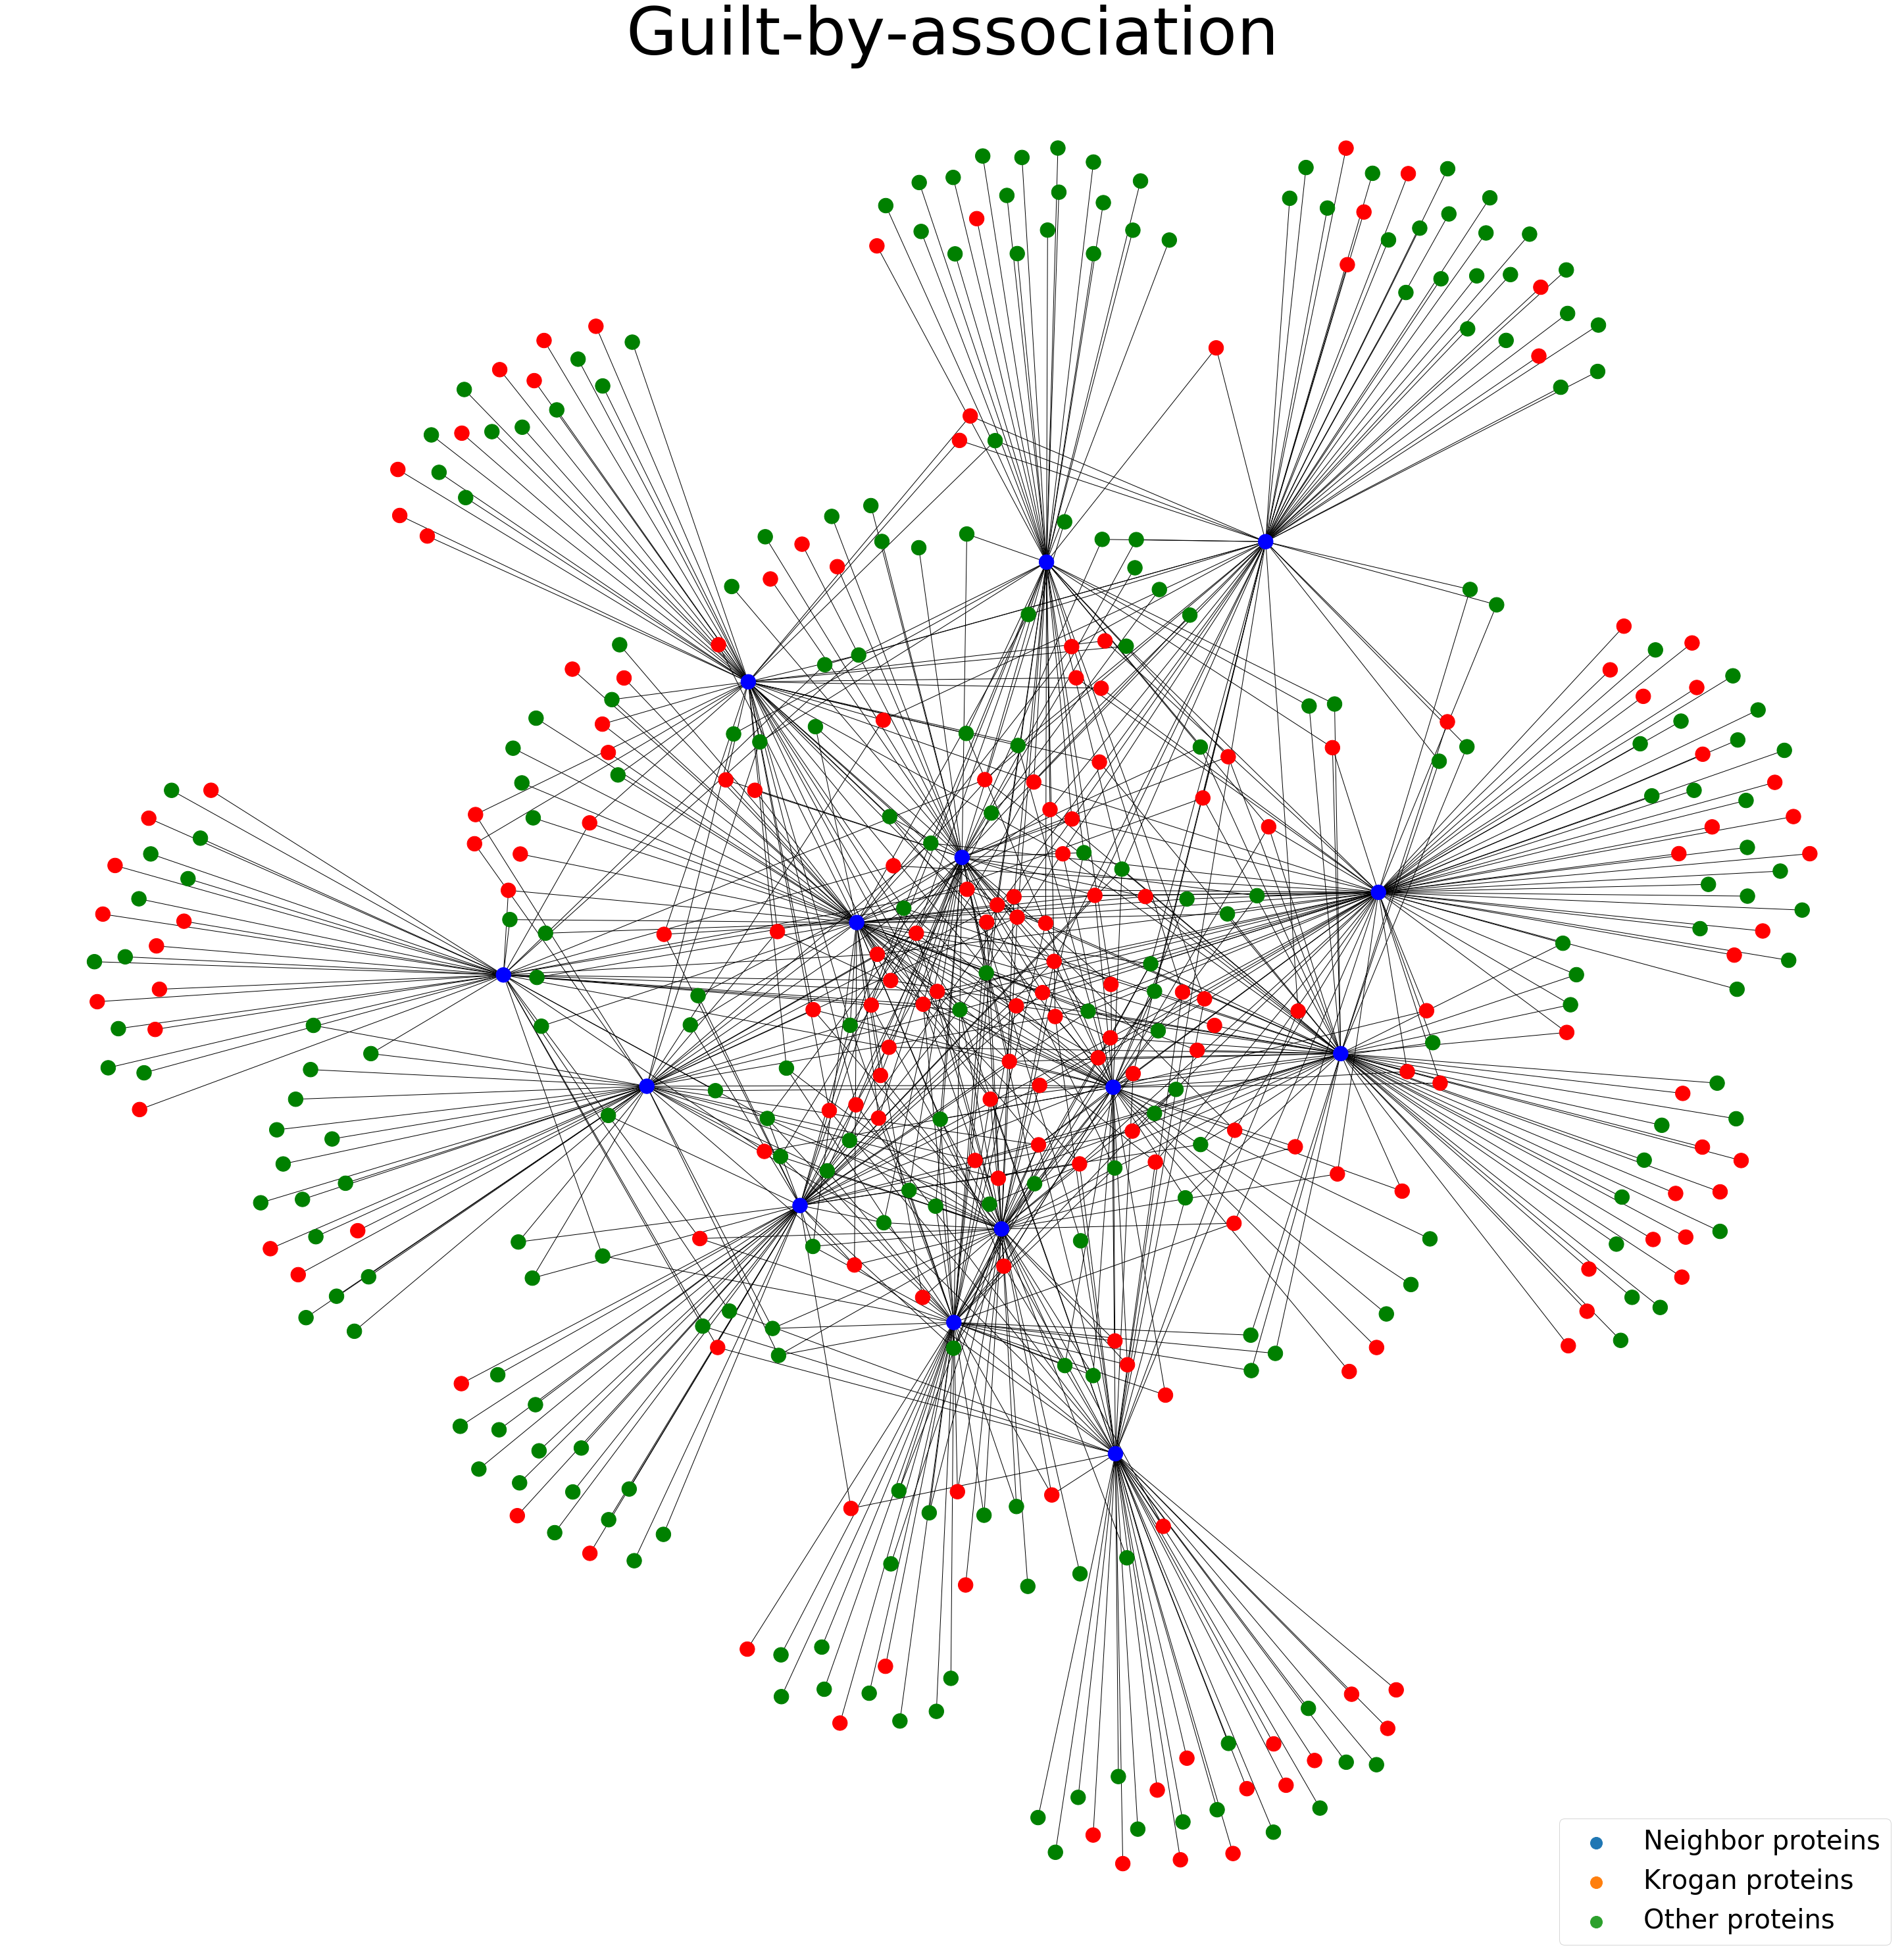

In [47]:
import random
g = nx.Graph()
for i in filtered_neighbor:
    for j in filtered_ppi[i]:
        g.add_edge(i, j)
#     print(test[i,0], test[i,1])

# add some random non_link proteins

for i in non_link.keys():
    ran_non_link = random.randint(20,40)
    for j in range(ran_non_link):
        g.add_edge(i, non_link[i][j])

color_map = []
for node in g:
    if node in krogan_proteins:
        color_map.append('red')
    elif node in neighbor:
        color_map.append('blue')
    else:
        color_map.append('green')

f = plt.figure(figsize = (40,40))  

nx.draw(g, with_Labels = False, node_color = color_map, node_size = 500, width = 1)

category = ['Neighbor proteins','Krogan proteins','Other proteins'];

for v in range(3):
    plt.scatter([],[], label= category[v] )

f.legend(fontsize = 40, markerscale=3, scatterpoints=1, loc = 4)
plt.title('Guilt-by-association', fontsize = 100)
plt.savefig('graph.png', bbox_inches = 'tight')
plt.show()

In [39]:
filtered_neighbor

['ENSG00000165280',
 'ENSG00000124006',
 'ENSG00000150991',
 'ENSG00000117748',
 'ENSG00000162231',
 'ENSG00000082898',
 'ENSG00000066044',
 'ENSG00000169515',
 'ENSG00000036257',
 'ENSG00000116663',
 'ENSG00000121481',
 'ENSG00000121022',
 'ENSG00000044090',
 'ENSG00000136997']